# Landfills

In [15]:
import geopandas as gpd 
import contextily as ctx

In [16]:
landfills = gpd.read_file('data/landfills.zip').to_crs(4267)
landfills.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    29 non-null     int64         
 1   LANDFILLNA  29 non-null     object        
 2   OPERATOR    28 non-null     object        
 3   WASTETYPE   26 non-null     object        
 4   LANDFILLST  26 non-null     object        
 5   LANDFILLDA  25 non-null     object        
 6   created_us  2 non-null      object        
 7   created_da  2 non-null      datetime64[ms]
 8   last_edite  2 non-null      object        
 9   last_edi_1  2 non-null      datetime64[ms]
 10  STAr        29 non-null     float64       
 11  STLe        29 non-null     float64       
 12  geometry    29 non-null     geometry      
dtypes: datetime64[ms](2), float64(2), geometry(1), int64(1), object(7)
memory usage: 3.1+ KB


In [17]:
drops = [
    'STLe', 'STAr', 'last_edi_1', 
    'created_da', 'created_us', 'last_edite'
]
landfills.drop(columns=drops, inplace=True)
print(landfills.iloc[::8])

    OBJECTID      LANDFILLNA             OPERATOR     WASTETYPE LANDFILLST  \
0         18  CERRO COLORADO  CITY OF ALBUQUERQUE     MUNICIPAL       OPEN   
8         20        CRAWFORD              PRIVATE  CONSTRUCTION     CLOSED   
16         3      SOUTH YALE  CITY OF ALBUQUERQUE     MUNICIPAL     CLOSED   
24        16     LOS ANGELES  CITY OF ALBUQUERQUE     MUNICIPAL     CLOSED   

      LANDFILLDA                                           geometry  
0   1990-PRESENT  POLYGON ((-106.86569 35.01071, -106.86431 35.0...  
8      1983-1985  POLYGON ((-106.4317 35.06629, -106.43143 35.06...  
16     1948-1965  MULTIPOLYGON (((-106.62793 35.04394, -106.6279...  
24     1978-1983  POLYGON ((-106.6008 35.18273, -106.60074 35.18...  


In [18]:
renames = dict(
    LANDFILLNA = 'Name', 
    OPERATOR = 'Operator', 
    WASTETYPE = 'Type', 
    LANDFILLST = 'Status', 
    LANDFILLDA = 'OperatingYears'
)
landfills.rename(columns=renames, inplace=True)

In [20]:
landfill_buffers = gpd.read_file('data/landfillsbuffers.zip').to_crs(4267)
landfill_buffers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    25 non-null     int64         
 1   LANDFILLNA  25 non-null     object        
 2   SCALE       25 non-null     int64         
 3   BUFFERDIST  25 non-null     int64         
 4   created_us  2 non-null      object        
 5   created_da  2 non-null      datetime64[ms]
 6   last_edite  2 non-null      object        
 7   last_edi_1  2 non-null      datetime64[ms]
 8   STAr        25 non-null     float64       
 9   STLe        25 non-null     float64       
 10  geometry    25 non-null     geometry      
dtypes: datetime64[ms](2), float64(2), geometry(1), int64(3), object(3)
memory usage: 2.3+ KB


In [21]:
landfill_buffers = landfill_buffers[['OBJECTID', 'LANDFILLNA',
                                     'BUFFERDIST', 'geometry']]
landfill_buffers.rename(columns={'LANDFILLNA':'Name', 
                                 'BUFFERDIST': 'BufferDistance'}, 
                        inplace=True)
print(landfill_buffers.iloc[::7])

    OBJECTID            Name  BufferDistance  \
0         19       SOUTHWEST            1000   
7          7        NAZARETH             500   
14        20  TIJERAS CANYON            1000   
21        11      SACRAMENTO             500   

                                             geometry  
0   POLYGON ((-106.76539 34.97669, -106.76539 34.9...  
7   POLYGON ((-106.58777 35.19362, -106.58778 35.1...  
14  POLYGON ((-106.3679 35.07314, -106.36768 35.07...  
21  POLYGON ((-106.57863 35.17561, -106.57863 35.1...  


In [22]:
landfills.loc[landfills.Name.str.contains('COX')]

,OBJECTID,Name,Operator,Type,Status,OperatingYears,geometry
14,22,W. W. COX,PRIVATE,CONSTRUCTION,CLOSED,1987-1989,"POLYGON ((-106.81482 35.05377, -106.81484 35.0..."


In [23]:
landfill_buffers.loc[landfill_buffers.Name.str.contains('COX')]

,OBJECTID,Name,BufferDistance,geometry
3,21,W.W. COX,1000,"POLYGON ((-106.81043 35.05557, -106.81044 35.0..."


In [24]:
landfill_buffers.loc[landfill_buffers.Name.str.contains('COX'), 'Name'] = 'W. W. COX'

In [25]:
landfills = landfills.merge(
    landfill_buffers, 
    on='Name', 
    how='left'
)
landfills.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID_x      29 non-null     int64   
 1   Name            29 non-null     object  
 2   Operator        28 non-null     object  
 3   Type            26 non-null     object  
 4   Status          26 non-null     object  
 5   OperatingYears  25 non-null     object  
 6   geometry_x      29 non-null     geometry
 7   OBJECTID_y      29 non-null     int64   
 8   BufferDistance  29 non-null     int64   
 9   geometry_y      29 non-null     geometry
dtypes: geometry(2), int64(3), object(5)
memory usage: 2.4+ KB


In [27]:
landfills.drop(columns=['OBJECTID_y', 'geometry_y'], inplace=True) 
landfills.rename(columns={'geometry_x': 'geometry'}, inplace=True)

In [28]:
landfills.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID_x      29 non-null     int64   
 1   Name            29 non-null     object  
 2   Operator        28 non-null     object  
 3   Type            26 non-null     object  
 4   Status          26 non-null     object  
 5   OperatingYears  25 non-null     object  
 6   geometry        29 non-null     geometry
 7   BufferDistance  29 non-null     int64   
dtypes: geometry(1), int64(2), object(5)
memory usage: 1.9+ KB


In [30]:
landfills.to_file('../../../data/local/abq_city_data.gpkg', 
                 layer='landfills')
landfills.to_file('../../../localData/City/landfills.gpkg')

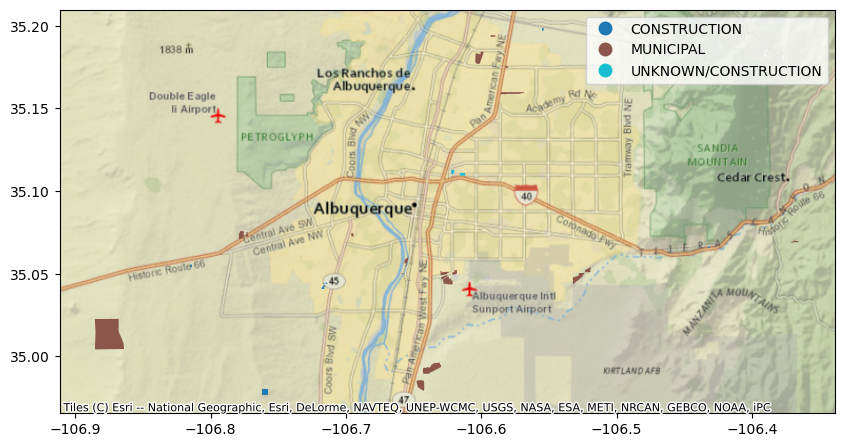

In [29]:
ax = landfills.plot(figsize=(10,8), column='Type', legend=True)
ctx.add_basemap(ax, crs=landfills.crs, 
               source=ctx.providers.Esri.NatGeoWorldMap);